In [56]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules_v2 import euler as euler
from modules_v2 import rs_rad_ker as rk
from scipy.interpolate import interp1d

%pylab notebook

figpath="../../articles/formalism/figures/"
!mkdir $figpath

Populating the interactive namespace from numpy and matplotlib
mkdir: ../../articles/formalism/figures/: File exists


In [57]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

b="#1f77b4"
o="#ff7f0e"
g="#2ca02c"
r="#d62728"
pr="#9467bd"
br="#8c564b"
p="#e377c2"
gr="#7f7f7f"
y="#bcbd22"
c="#17becf"

In [58]:
sampling=10000 ; nside_max=1024 ;  lmaxh=3*nside_max
thetas,pl2=rk.get_plm0(lmaxh,sampling,theta_max=pi)

In [59]:
theta=linspace(0,pi,20000)

nside=16 ; lmax=3*nside ; lmin=2
rad_ker=rk.calc_qu2eb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker) ; rad_ker16=fn(theta)

nside=32 ; lmax=3*nside ; lmin=2
rad_ker=rk.calc_qu2eb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker) ; rad_ker32=fn(theta)

nside=64 ; lmax=3*nside ; lmin=2
rad_ker=rk.calc_qu2eb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker) ; rad_ker64=fn(theta)

nside=128 ; lmax=3*nside ; lmin=2
rad_ker=rk.calc_qu2eb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker) ; rad_ker128=fn(theta)

nside=256 ; lmax=3*nside ; lmin=2
rad_ker=rk.calc_qu2eb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker) ; rad_ker256=fn(theta)

<IPython.core.display.Javascript object>


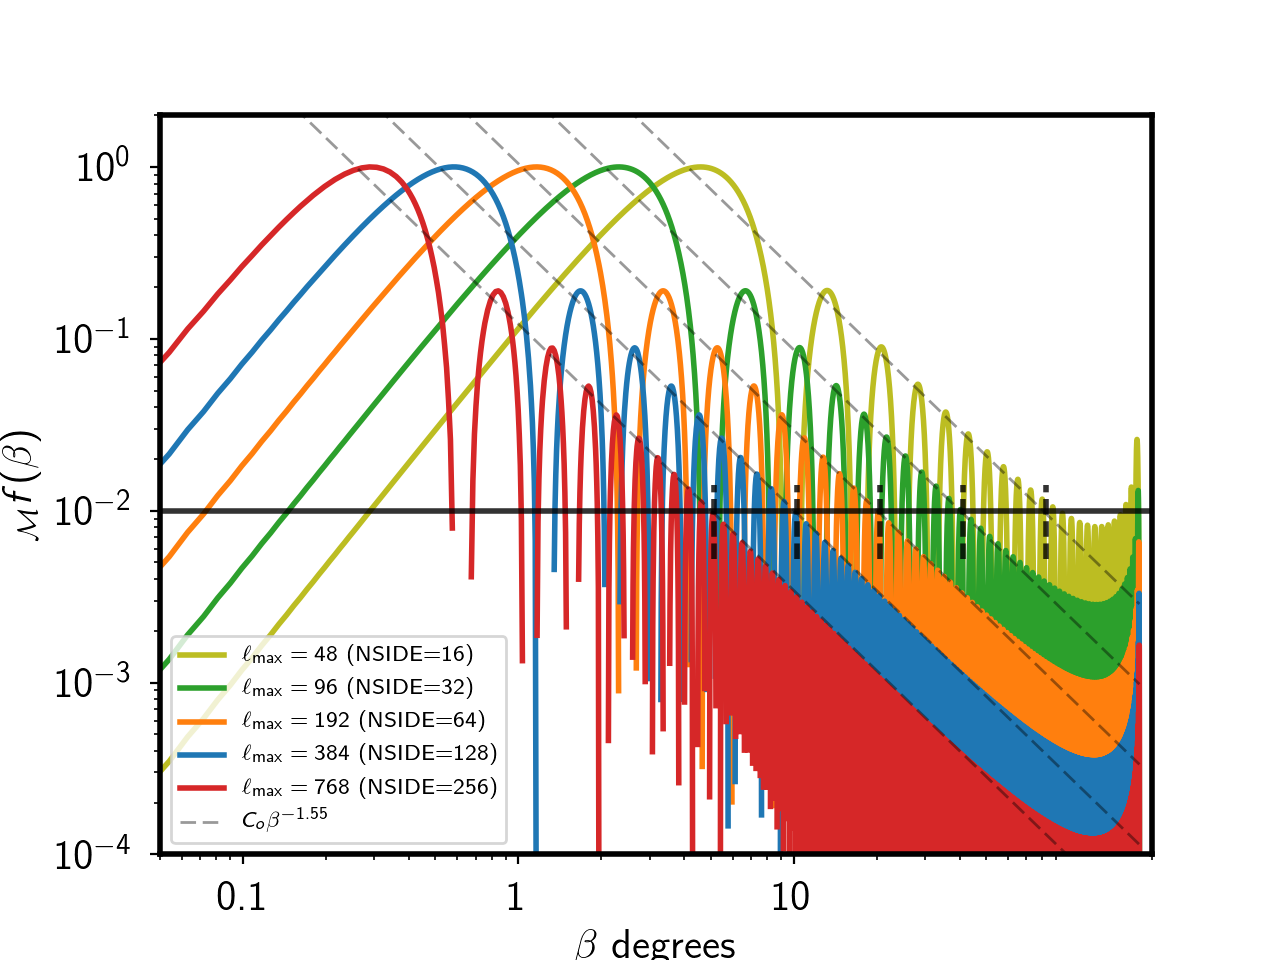

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in power


In [60]:
figure()
degree=theta*180./pi
plot(degree,rad_ker16/max(rad_ker16),"-",c=y,label=r"$\ell_{\rm max}=48$ (NSIDE=16)")
plot(degree,rad_ker32/max(rad_ker32),"-",c=g,label=r"$\ell_{\rm max}=96$ (NSIDE=32)")
plot(degree,rad_ker64/max(rad_ker64),"-",c=o,label=r"$\ell_{\rm max}=192$ (NSIDE=64)")
plot(degree,rad_ker128/max(rad_ker128),"-",c=b,label=r"$\ell_{\rm max}=384$ (NSIDE=128)")
plot(degree,rad_ker256/max(rad_ker256),"-",c=r,label=r"$\ell_{\rm max}=768$ (NSIDE=256)")
#plot(degree,rad_ker1024/max(rad_ker1024),"-",c=br,label=r"$\ell_{\rm max}=3072$ (NSIDE=1024)")

axhline(1e-2,linestyle="solid",color="black",alpha=0.8)

c0=0.122 ; sl=1.55
plot(degree,c0*(degree)**(-sl),"k--",lw=1,alpha=0.4,label=r"$C_o \beta^{-" +str(sl) + "}$")
plot(degree,c0*((768./384)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
plot(degree,c0*((768./192)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
plot(degree,c0*((768./96)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
plot(degree,c0*((768./48)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
#plot(degree,c0*((768./24)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)

tmax=180.*(22./(3.*16)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.8,linestyle="dashed")
tmax=180.*(22./(3.*32.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.8,linestyle="dashed")
tmax=180.*(22./(3.*64.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.8,linestyle="dashed")
tmax=180.*(22./(3.*128.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.8,linestyle="dashed")
tmax=180.*(22./(3.*256.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.8,linestyle="dashed")

legend(loc=0,fontsize=8)
xlabel(r"$\beta$ degrees")
ylabel(r"${_{\mathcal{M}}f}(\beta)$")

xlim(5e-2,200)
ylim(1e-4,2)

loglog()
xticks([0.1,1,10],[0.1,1,10])

savefig(figpath + "rad_ker_fn_of_ellmax.pdf",dpi=300,bbox_inches="tight")

In [61]:
#theta=linspace(0,pi,10000)

nside=16 ; lmax=3*nside ; lmin=2
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker_i) ; rad_ker_i16=fn(theta)
fn=interp1d(thetas,rad_ker_d) ; rad_ker_d16=fn(theta)

nside=32 ; lmax=3*nside ; lmin=2
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker_i) ; rad_ker_i32=fn(theta)
fn=interp1d(thetas,rad_ker_d) ; rad_ker_d32=fn(theta)

nside=64 ; lmax=3*nside ; lmin=2
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker_i) ; rad_ker_i64=fn(theta)
fn=interp1d(thetas,rad_ker_d) ; rad_ker_d64=fn(theta)

nside=128 ; lmax=3*nside ; lmin=2
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker_i) ; rad_ker_i128=fn(theta)
fn=interp1d(thetas,rad_ker_d) ; rad_ker_d128=fn(theta)

nside=256 ; lmax=3*nside ; lmin=2
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker_i) ; rad_ker_i256=fn(theta)
fn=interp1d(thetas,rad_ker_d) ; rad_ker_d256=fn(theta)

<IPython.core.display.Javascript object>


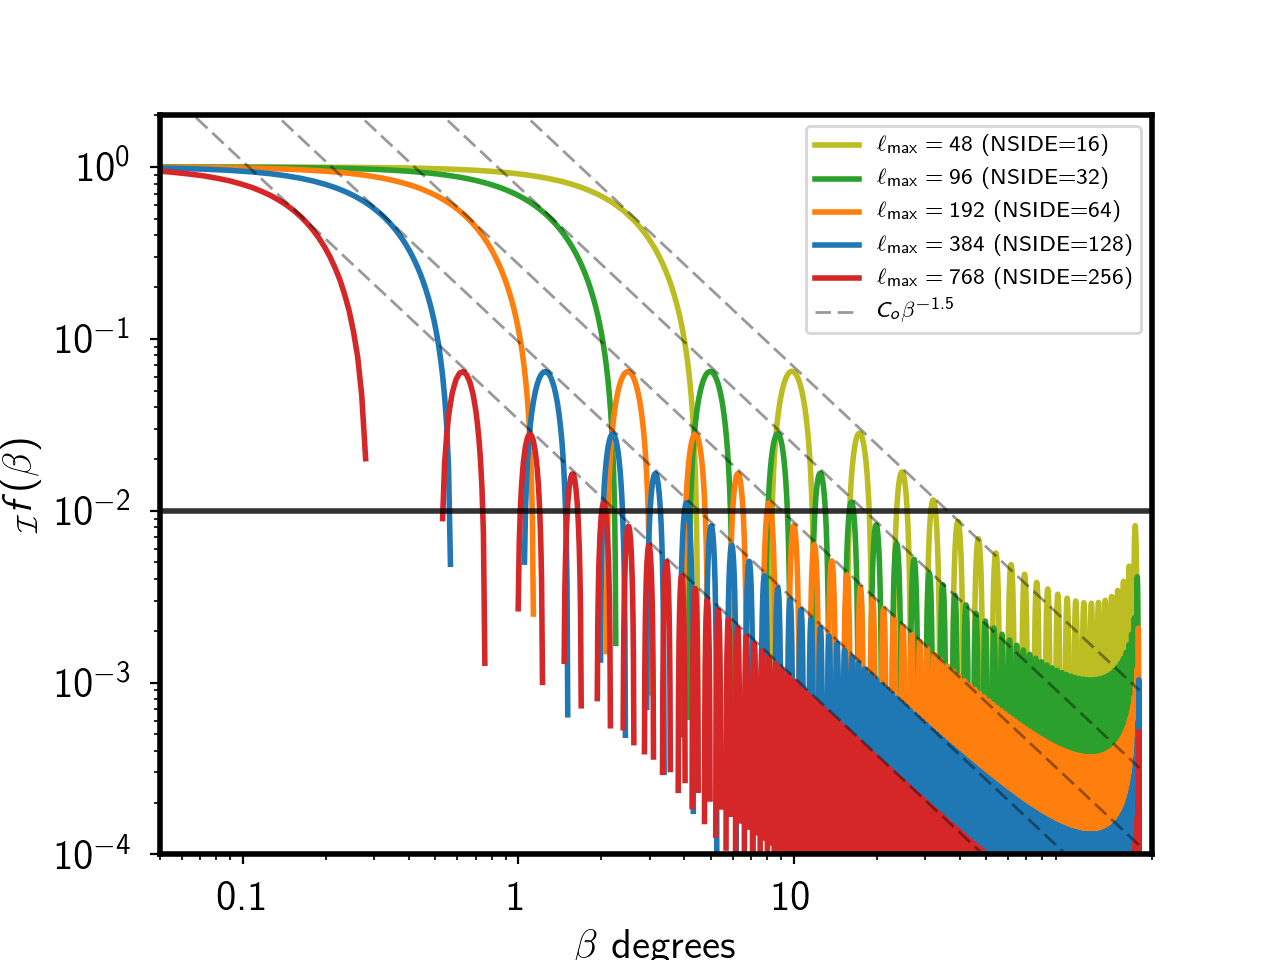

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in power


In [77]:
figure()
degree=theta*180./pi
plot(degree,rad_ker_i16/max(rad_ker_i16),"-",c=y,label=r"$\ell_{\rm max}=48$ (NSIDE=16)")
plot(degree,rad_ker_i32/max(rad_ker_i32),"-",c=g,label=r"$\ell_{\rm max}=96$ (NSIDE=32)")
plot(degree,rad_ker_i64/max(rad_ker_i64),"-",c=o,label=r"$\ell_{\rm max}=192$ (NSIDE=64)")
plot(degree,rad_ker_i128/max(rad_ker_i128),"-",c=b,label=r"$\ell_{\rm max}=384$ (NSIDE=128)")
plot(degree,rad_ker_i256/max(rad_ker_i256),"-",c=r,label=r"$\ell_{\rm max}=768$ (NSIDE=256)")

axhline(1e-2,linestyle="solid",color="black",alpha=0.8)

c0=0.034 ; sl=1.5
plot(degree,c0*(degree)**(-sl),"k--",lw=1,alpha=0.4,label=r"$C_o \beta^{-" +str(sl) + "}$")
plot(degree,c0*((768./384)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
plot(degree,c0*((768./192)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
plot(degree,c0*((768./96)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
plot(degree,c0*((768./48)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
#plot(degree,c0*((768./24)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)

#tmax=180.*(22./(3.*16)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")
#tmax=180.*(22./(3.*32.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")
#tmax=180.*(22./(3.*64.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")
#tmax=180.*(22./(3.*128.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")
#tmax=180.*(22./(3.*256.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")

legend(loc=0,fontsize=8)
xlabel(r"$\beta$ degrees")
ylabel(r"${_{\mathcal{I}}f}(\beta)$")

xlim(5e-2,200)
ylim(1e-4,2)

loglog()
xticks([0.1,1,10],[0.1,1,10])

savefig(figpath + "rad_ker_i_fn_of_ellmax.pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


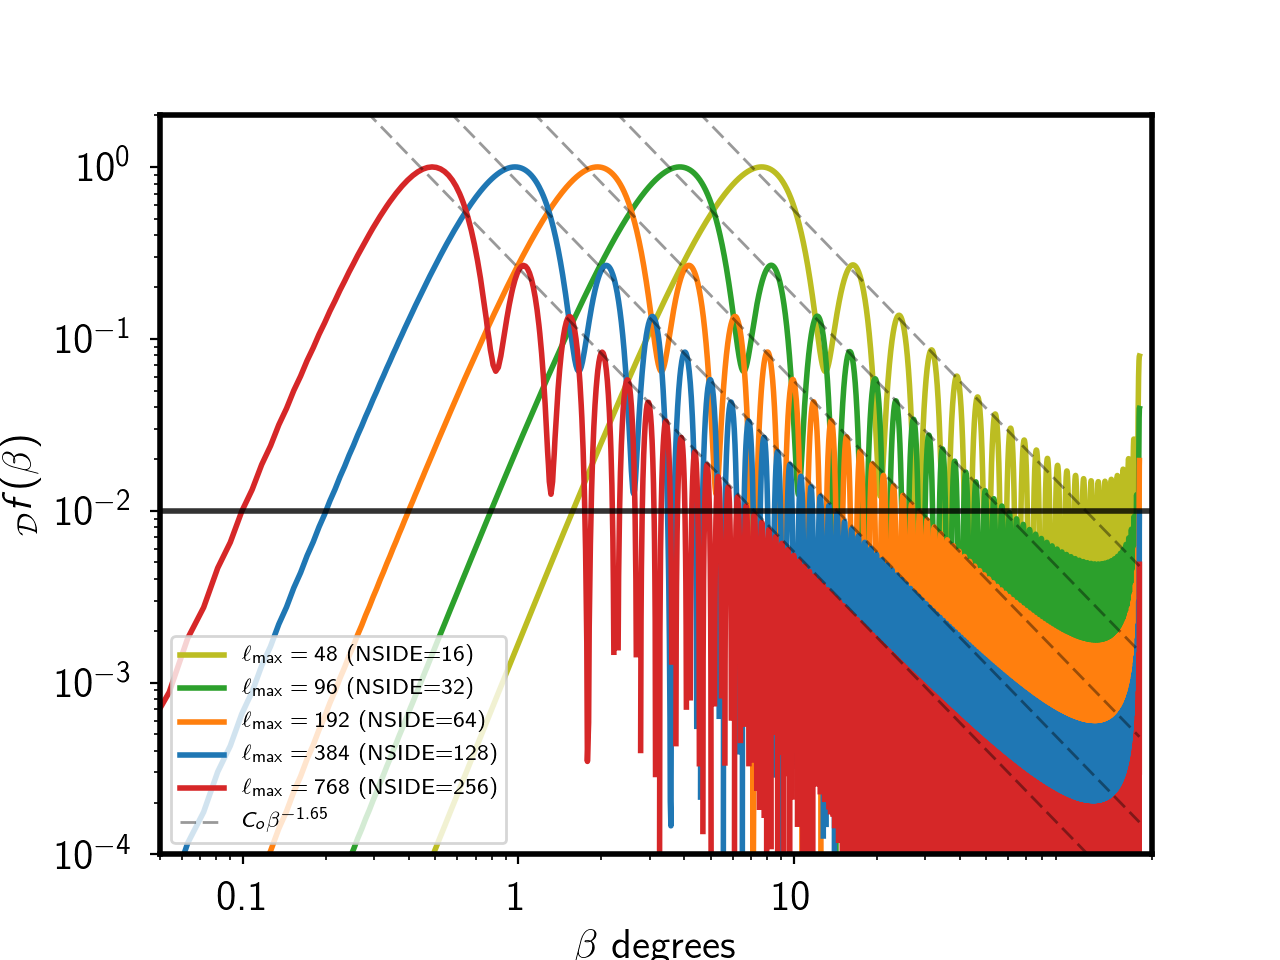

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in power


In [76]:
figure()
degree=theta*180./pi
plot(degree,rad_ker_d16/max(rad_ker_d16),"-",c=y,label=r"$\ell_{\rm max}=48$ (NSIDE=16)")
plot(degree,rad_ker_d32/max(rad_ker_d32),"-",c=g,label=r"$\ell_{\rm max}=96$ (NSIDE=32)")
plot(degree,rad_ker_d64/max(rad_ker_d64),"-",c=o,label=r"$\ell_{\rm max}=192$ (NSIDE=64)")
plot(degree,rad_ker_d128/max(rad_ker_d128),"-",c=b,label=r"$\ell_{\rm max}=384$ (NSIDE=128)")
plot(degree,rad_ker_d256/max(rad_ker_d256),"-",c=r,label=r"$\ell_{\rm max}=768$ (NSIDE=256)")

axhline(1e-2,linestyle="solid",color="black",alpha=0.8)

c0=0.0315*8.2 ; sl=1.65
plot(degree,c0*(degree)**(-sl),"k--",lw=1,alpha=0.4,label=r"$C_o \beta^{-" +str(sl) + "}$")
plot(degree,c0*((768./384)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
plot(degree,c0*((768./192)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
plot(degree,c0*((768./96)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
plot(degree,c0*((768./48)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)
#plot(degree,c0*((768./24)**sl)*(degree)**(-sl),"k--",lw=1,alpha=0.4)

#tmax=180.*(22./(3.*16)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")
#tmax=180.*(22./(3.*32.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")
#tmax=180.*(22./(3.*64.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")
#tmax=180.*(22./(3.*128.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")
#tmax=180.*(22./(3.*256.)) ; axvline(tmax,0.4,0.5,color="k",alpha=0.5,linestyle="dashed")

legend(loc=0,fontsize=8)
xlabel(r"$\beta$ degrees")
ylabel(r"${_{\mathcal{D}}f}(\beta)$")

xlim(5e-2,200)
ylim(1e-4,2)

loglog()
xticks([0.1,1,10],[0.1,1,10])

savefig(figpath + "rad_ker_d_fn_of_ellmax.pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


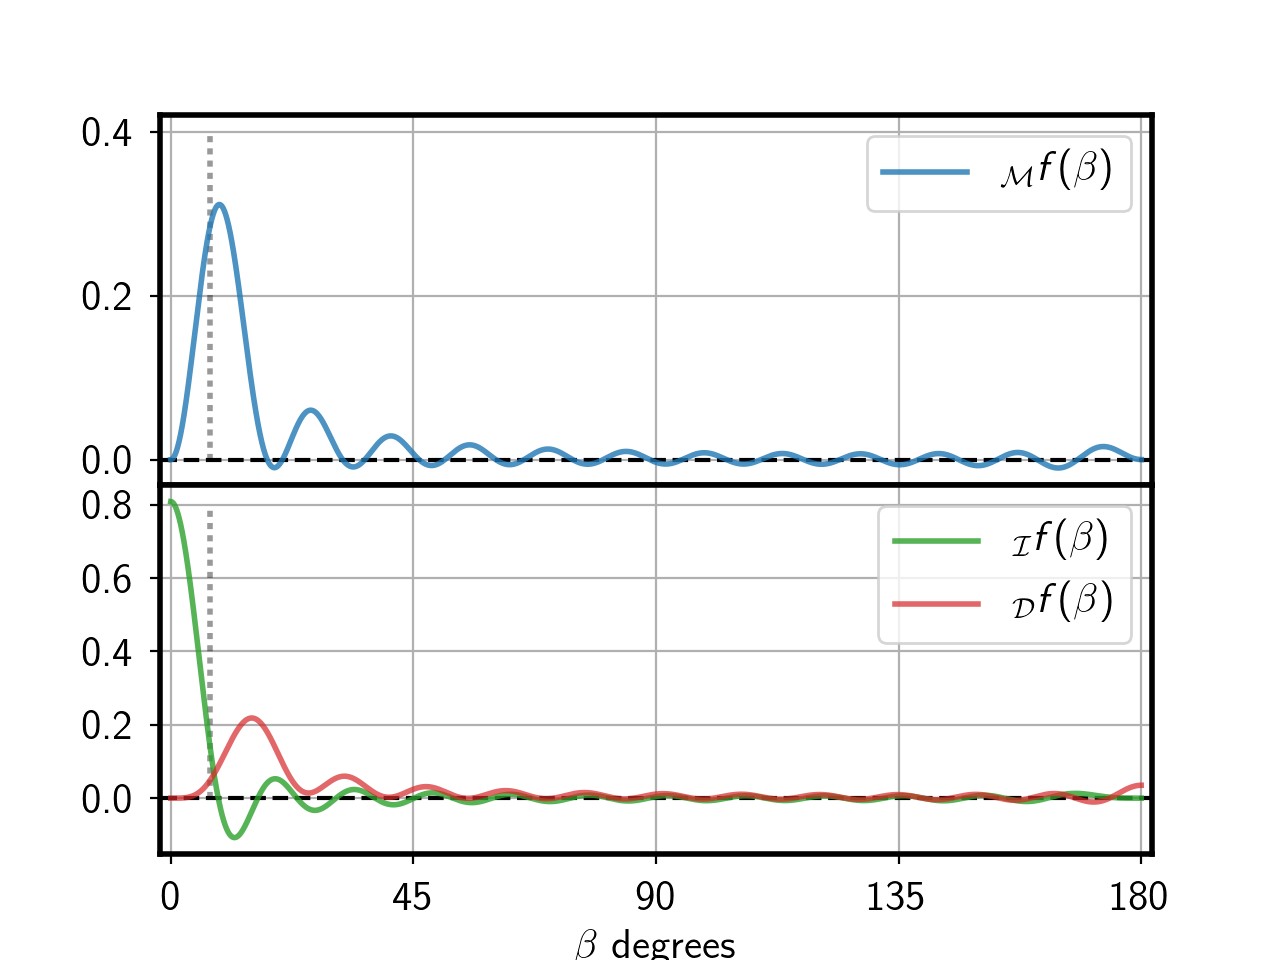

In [66]:
nside=8 ; lmax=3*nside ; lmin=2 ; norm=4.*pi/h.nside2npix(nside)

rad_ker=rk.calc_qu2eb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker*norm) ; rad_ker8=fn(theta)

rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,thetas,pl2)
fn=interp1d(thetas,rad_ker_i*norm) ; rad_ker_i8=fn(theta)
fn=interp1d(thetas,rad_ker_d*norm) ; rad_ker_d8=fn(theta)

#figure()
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
ax1.plot(degree,rad_ker8,"-",c=b,label=r"${}_{\mathcal{M}}f(\beta)$",alpha=0.8)
ax1.hlines(0,-10,200,linestyle="dashed",lw=1.5)
ax1.grid()
ax1.legend(loc=0)
ax1.vlines(sqrt(4.*pi/h.nside2npix(nside))*180/pi,0,0.4,lw=2,linestyle="dotted",color="k",alpha=0.4)
#yticks([0,0.2,0.4,0.6,0.8],[0,0.2,0.4,0.6,0.8])
ax2.plot(degree,rad_ker_i8,"-",c=g,lw=2,label=r"${}_{\mathcal{I}}f(\beta)$",alpha=0.8)
ax2.plot(degree,rad_ker_d8,"-",c=r,lw=2,label=r"${}_{\mathcal{D}}f(\beta)$",alpha=0.7)
f.subplots_adjust(hspace=0)
ax2.hlines(0,-10,200,linestyle="dashed",lw=1.5)
ax2.grid()
ax2.legend(loc=0)
ax2.vlines(sqrt(4.*pi/h.nside2npix(nside))*180/pi,0,0.8,lw=2,linestyle="dotted",color="k",alpha=0.4)
xticks([0,45,90,135,180],[0,45,90,135,180])
yticks([0,0.2,0.4,0.6,0.8],[0.0,0.2,0.4,0.6,0.8])
xlim(-2,182)
xlabel(r"$\beta$ degrees")
savefig(figpath + "beta_kernel.pdf",dpi=300,bbox_inches="tight")